<a href="https://colab.research.google.com/github/Polclard/DataScienceProjects/blob/master/Copy_of_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color = 'Orange'>Scraping page</font>
You need to scrape the phones with their price from: https://mobelix.com.mk/mk/mobilni-telefoni

The informations you need to extract are:


*   Phone brand: html tag (\<h5 class="mb-0">\)
*   Phone type: html tag (\<h3 class="h5 font-weight-normal">\)
*   Phone price: html tag (\<p class="h5 price">\)



# <font color='Orange'>Requirements specified for Web Scraping</font> (0.1 POINTS)


Import all libraries and modules that you are going to use.

In [ ]:
#start here
#shift+enter in this box will run the code that's here and open a new code-box below
#import ....
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup as bs
from IPython.display import HTML
import warnings
from datetime import date
import random
import matplotlib.pyplot as plt

# <font color = 'Orange'> Start the scraping by sending HTTP request</font> (0.3 POINTS)


 **Fetch a website's content - send request**

In [ ]:
#add your code
url = "https://mobelix.com.mk/mk/mobilni-telefoni"
response = requests.get(url)
response

<Response [200]>

**Get the response-status code and see:**
<li>If the code starts with a 2, it means the request was successful.



In [ ]:
#add your code
response.status_code

200

# <font color = 'orange'>Parse the HTML with BeautifulSoup</font> (0.3 POINTS)

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work.


**Parse using BeautifulSoap**




In [ ]:
#add your code
raw_html = response.text
beautified_html = bs(raw_html, "html.parser")

**Print the HTML code that you get**

In [ ]:
#add your code
beautified_html

<!DOCTYPE html>

<html lang="en">
<head>
<!-- Required meta tags -->
<meta charset="utf-8"/>
<title>Мобилни телефони | Mobelix Premium Mobilara</title>
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
<meta content="Мобилни телефони | Mobelix Премиум Мобилара" name="title"/>
<meta content="Mobile Store I Service | Mobelix Premium Mobilara Skopje нуди најголем избор на премиум додатоци за мобилни телефони: маски за мобилни телефони, диспеј, полначи, полначи за кола, бежични полначи, power bank, bluetooth слушалки, usb кабли, фолии и стакла за дисплеј и др." name="description"/>
<meta content="mobilara, mobilara skopje, mobilni dodatoci, мобилни додатоци, полначи, бежични полначи, power bank, Bluetooth slusalki, maski za telefoni" name="keywords"/>
<meta content="Mobelix Премиум Мобилара" property="og:site_name">
<meta content="http://mobelix.com.mk/mk/mobilni-telefoni" property="og:url">
<meta content="Мобилни телефони | Mobelix Премиум Мобилара" p

# <font color='Orange'>Extracting data</font> (0.7 POINTS)

From the printed HTML code search for the data you need for building the dataset, by the classes that are given above in the html tags listed.



**Try to select the first element from your attributes. Find out from the html code what part do you need.**

In [ ]:
#add your code
# phone_brands = beautified_html.select("body section:nth-child(5) div div div:nth-child(2) div:nth-child(2) div div a div div:nth-child(2) h5")
phone_brands = beautified_html.select("h5.mb-0")

**Add as many codeboxes as you need for selecting all the html elements**

In [ ]:
#add your code
# phone_type = beautified_html.select("body section:nth-child(5) div div div:nth-child(2) div:nth-child(2) div div a div div:nth-child(2) h3")
phone_type = beautified_html.select("h3.font-weight-normal")
# phone_price = beautified_html.select("body section:nth-child(5) div div div:nth-child(2) div:nth-child(2) div div a div div:nth-child(2) p")
phone_price = beautified_html.select("p.price")

**Create lists with the extracted data from the html elements that you selected**

In [ ]:
#add your code
phone_brands
phone_type
phone_price

[<p class="h5 price">19,000.00 ден</p>,
 <p class="h5 price"><del class="mr-2 small">9,200.00</del><br/>8,300.00 ден</p>,
 <p class="h5 price"><del class="mr-2 small">10,500.00</del><br/>8,300.00 ден</p>,
 <p class="h5 price"><del class="mr-2 small">67,600.00</del><br/>61,500.00 ден</p>,
 <p class="h5 price"><del class="mr-2 small">94,100.00</del><br/>89,200.00 ден</p>,
 <p class="h5 price"><del class="mr-2 small">80,000.00</del><br/>78,100.00 ден</p>,
 <p class="h5 price"><del class="mr-2 small">116,900.00</del><br/>98,400.00 ден</p>,
 <p class="h5 price"><del class="mr-2 small">58,500.00</del><br/>55,300.00 ден</p>,
 <p class="h5 price"><del class="mr-2 small">47,990.00</del><br/>46,800.00 ден</p>]

**Print all lists that are containing the elements**

In [ ]:
#add your code
[print(item.text) for item in phone_brands]
[print(item.text) for item in phone_type]
[print(int(item.text.split(".")[0].replace(",",""))) for item in phone_price]

Blackberry
Samsung
Samsung
Apple
Apple
Apple
Apple
Apple
Apple
Porsche Design P9981
Galaxy A03s 4/64GB
Galaxy A04s 3/32GB
iPhone 14 Pro Max 128GB E-SIM
iPhone 14 Pro 512GB
iPhone 14 Pro Max 512GB
iPhone 14 Pro Max 1TB
iPhone 14 Pro 128GB E-SIM
iPhone 13 Mini 256GB
19000
9200
10500
67600
94100
80000
116900
58500
47990


[None, None, None, None, None, None, None, None, None]

**Check if all lists are the same size**

In [ ]:
#add your code
len(phone_brands) == len(phone_type) == len(phone_price)

True

# <font color='Orange'>Create a Pandas DataFrame</font> (0.1 POINTS)


**Create the DataFrame from the lists you get and name your *Columns***

In [ ]:
#add your code
phone_brands_list = [item.text for item in phone_brands]
phone_type_list = [item.text for item in phone_type]
phone_price_list = [int(item.text.split(".")[0].replace(",","")) for item in phone_price]

item_dict = dict()

item_dict["Phone Brand"] = phone_brands_list
item_dict["Phone Type"] = phone_type_list
item_dict["Phone Price"] = phone_price_list

df = pd.DataFrame(item_dict)

**Print the dataset you obtain**

In [ ]:
#add your code
df

,Phone Brand,Phone Type,Phone Price
0,Blackberry,Porsche Design P9981,19000
1,Samsung,Galaxy A03s 4/64GB,9200
2,Samsung,Galaxy A04s 3/32GB,10500
3,Apple,iPhone 14 Pro Max 128GB E-SIM,67600
4,Apple,iPhone 14 Pro 512GB,94100
5,Apple,iPhone 14 Pro Max 512GB,80000
6,Apple,iPhone 14 Pro Max 1TB,116900
7,Apple,iPhone 14 Pro 128GB E-SIM,58500
8,Apple,iPhone 13 Mini 256GB,47990


#<font color='orange'>EDA</font> (0.2 POINTS)

## <font color='Orange'>Find statistic elements for the prices</font>
Like mean, median,  standard deviation, minimum, maximum

In [ ]:
#add your code
print(f"Mean: {df['Phone Price'].mean()}")
print(f'Median: {df["Phone Price"].median()}')
print(f'Standard Deviation: {df["Phone Price"].std()}')
print(f'Minimum: {df["Phone Price"].min()}')
print(f'Maximum: {df["Phone Price"].max()}')

Mean: 55976.666666666664
Median: 58500.0
Standard Deviation: 38031.03206593268
Minimum: 9200
Maximum: 116900


# <font color = 'Orange'>Data visualization </font> (0.3 POINTS)

Make a histogram & bar chart for the price values

<Axes: >

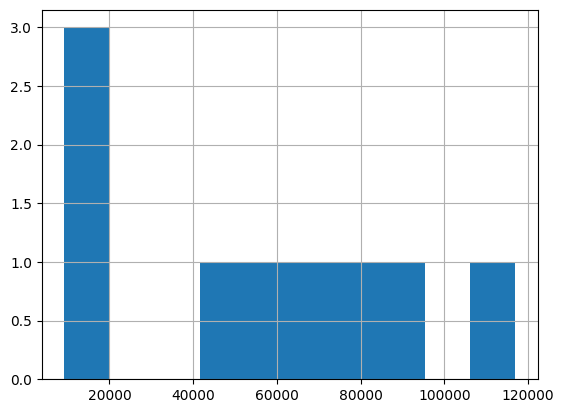

In [ ]:
#add your code
df["Phone Price"].hist()

<Axes: >

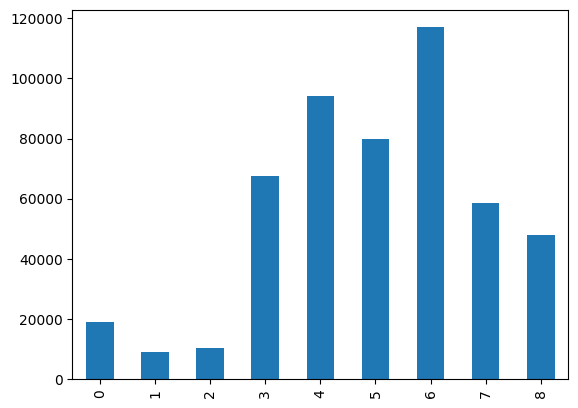

In [ ]:
df["Phone Price"].plot.bar()